In [3]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig

%matplotlib notebook

In [13]:
dfiles = [['transfer/b-foot/2301_openstart.aup',
          'transfer/b-foot/2301_closing_1.aup',
          'transfer/b-foot/2301_closing_2.aup',
          'transfer/b-foot/2301_closing_3.aup',
          'transfer/b-foot/2301_closing_4.aup',
          'transfer/b-foot/2301_closing_5.aup',
          'transfer/b-foot/2301_closing_6.aup',
          'transfer/b-foot/2301_closing_7.aup',
          'transfer/b-foot/2301_closing_8.aup',
          'transfer/b-foot/2301_closing_9.aup',
          'transfer/b-foot/2301_closing_10.aup',
          'transfer/b-foot/2301_closing_11.aup',
          'transfer/b-foot/2301_closing_12.aup',
          'transfer/b-foot/2301_closing_13.aup',
          'transfer/b-foot/2301_closing_14.aup',
          'transfer/b-foot/2301_closing_15.aup',
          'transfer/b-foot/2301_closing_16.aup'],
           ['transfer/b-foot/2301-2_openstart.aup',
          'transfer/b-foot/2301-2_closing_1.aup',
          'transfer/b-foot/2301-2_closing_2.aup',
          'transfer/b-foot/2301-2_closing_3.aup',
          'transfer/b-foot/2301-2_closing_4.aup',
          'transfer/b-foot/2301-2_closing_5.aup',
          'transfer/b-foot/2301-2_closing_6.aup',
          'transfer/b-foot/2301-2_closing_7.aup',
          'transfer/b-foot/2301-2_closing_8.aup',
          'transfer/b-foot/2301-2_closing_9.aup',
          'transfer/b-foot/2301-2_closing_10.aup',
          'transfer/b-foot/2301-2_closing_11.aup',
          'transfer/b-foot/2301-2_closing_12.aup',
          'transfer/b-foot/2301-2_closing_13.aup',
          'transfer/b-foot/2301-2_closing_14.aup',
          'transfer/b-foot/2301-2_closing_15.aup',
          'transfer/b-foot/2301-2_closing_16.aup'],
          ['pointclose/2401_test_0.aup',
           'pointclose/2401_test_1.aup',
           'pointclose/2401_test_2.aup',
           'pointclose/2401_test_3.aup',
           'pointclose/2401_test_4.aup',
           'pointclose/2401_test_5.aup',
           'pointclose/2401_test_6.aup',
           'pointclose/2401_test_7.aup',
           'pointclose/2401_test_8.aup',
           'pointclose/2401_test_9.aup',
           'pointclose/2401_test_10.aup',
           'pointclose/2401_test_11.aup',
           'pointclose/2401_test_12.aup',
           'pointclose/2401_test_13.aup',
           'pointclose/2401_test_14.aup',
           'pointclose/2401_test_15.aup',
           'pointclose/2401_test_16.aup'],
          ['pointclose/2401_test2_0.aup',
           'pointclose/2401_test2_1.aup',
           'pointclose/2401_test2_2.aup',
           'pointclose/2401_test2_3.aup',
           'pointclose/2401_test2_4.aup',
           'pointclose/2401_test2_5.aup',
           'pointclose/2401_test2_6.aup',
           'pointclose/2401_test2_7.aup',
           'pointclose/2401_test2_8.aup',
           'pointclose/2401_test2_9.aup',
           'pointclose/2401_test2_10.aup',
           'pointclose/2401_test2_11.aup',
           'pointclose/2401_test2_12.aup',
           'pointclose/2401_test2_13.aup',
           'pointclose/2401_test2_14.aup',
           'pointclose/2401_test2_15.aup',
           'pointclose/2401_test2_16.aup']]

In [14]:
x = len(dfiles)
x

4

In [15]:
ch1 = [[] for i in range(x)]
ch2 = [[] for i in range(x)]
ch3 = [[] for i in range(x)]
keysigRMS = [[] for i in range(x)]
keysigSI = [[] for i in range(x)]
fsens=9820
for n in range(x):
    for file in dfiles[n]:
        au = audacity.Aup(file)
        if au.nchannels == 4:
            ch1[n].append(au.get_channel_data(1)) 
            ch2[n].append(au.get_channel_data(2))
            ch3[n].append(au.get_channel_data(3))
        elif au.nchannels == 1:
            ch1[n].append(au.get_channel_data(0))
        
    for k, keysig in enumerate(ch1[n]):
        keysigRMS[n].append(np.mean(np.abs(sut.Heterodyn(keysig,fsens,sr=au.rate,nwind=32)[0])))
        keyclosed = 5.75
        keyvals = np.arange(2.5, 6.75, 0.25)
        keysigSI[n].append(keyvals[k] - keyclosed)

<IPython.core.display.Javascript object>


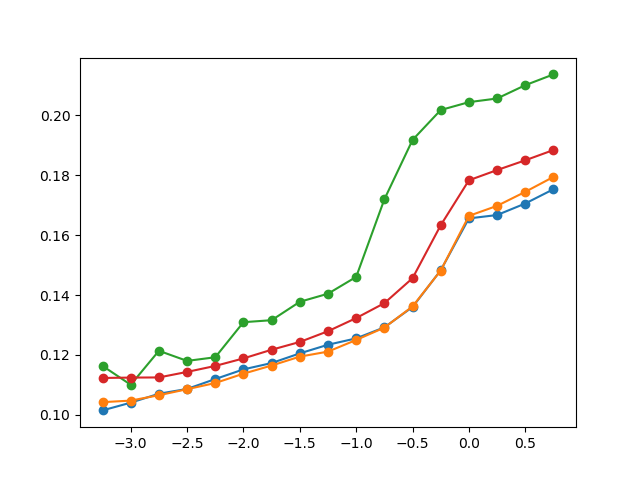

In [16]:
plt.figure()
for n in range(x):
    plt.plot(keysigSI[n], keysigRMS[n], 'o-')

In [9]:
keysigSI[0]

[-3.25,
 -3.0,
 -2.75,
 -2.5,
 -2.25,
 -2.0,
 -1.75,
 -1.5,
 -1.25,
 -1.0,
 -0.75,
 -0.5,
 -0.25,
 0.0,
 0.25,
 0.5,
 0.75]

In [11]:

chimney = 0.014
foot = 0.155
bore = 0.019

rho = 1.2
c = 343
gamma = 1.4
P = 101000


In [24]:
# columns = (
#     'L 1', 'L 2', 'L avg' 'Inertance 1', 'Inertance 2', 'Inertance avg', 'Helmholtz f 1', 'Helmholtz f 2', 'Helmholtz avg')
# rows = ['%d mm' % x for x in np.arange(2.5, 6.75, 0.25)]

Lvals = [[],[]]
Avals = [[],[]]
iL = [[],[]]
Hf = [[],[]]

for n in range(2):
    for k, keyval in enumerate(keysigSI[n]):
        V = np.pi*bore**2*foot

        keyavg = np.abs(np.mean([keyval/3, keyval]))
        L = 2*keyavg*0.001
        Lvals[n].append(L)
        A = np.pi*chimney*(keyavg*0.001)
        Avals[n].append(A)
        inertance = (rho*L)/A
        iL[n].append(inertance)

        Hfreq = (np.sqrt((gamma*P)/V*inertance))/(2*np.pi)
        Hf[n].append(Hfreq)
    
# cell_text = []
# for row in range(17):
#     plt.bar(, L[1][row])
#     y_offset = y_offset + data[row]
#     cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# plt.table(
# cellText=[])

(Lvals, Avals, iL, Hf)

C:\Users\acoustics\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


([[0.0043333333333333331,
   0.0040000000000000001,
   0.0036666666666666666,
   0.0033333333333333335,
   0.0030000000000000001,
   0.0026666666666666666,
   0.0023333333333333335,
   0.002,
   0.0016666666666666668,
   0.0013333333333333333,
   0.001,
   0.00066666666666666664,
   0.00033333333333333332,
   0.0,
   0.00033333333333333332,
   0.00066666666666666664,
   0.001],
  [0.0043333333333333331,
   0.0040000000000000001,
   0.0036666666666666666,
   0.0033333333333333335,
   0.0030000000000000001,
   0.0026666666666666666,
   0.0023333333333333335,
   0.002,
   0.0016666666666666668,
   0.0013333333333333333,
   0.001,
   0.00066666666666666664,
   0.00033333333333333332,
   0.0,
   0.00033333333333333332,
   0.00066666666666666664,
   0.001]],
 [[9.5294977158890383e-05,
   8.796459430051421e-05,
   8.0634211442138023e-05,
   7.3303828583761837e-05,
   6.5973445725385651e-05,
   5.8643062867009464e-05,
   5.1312680008633291e-05,
   4.3982297150257105e-05,
   3.6651914291880918e